Dataset Shape: (284807, 31)

Missing Values:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Class Distribution:
 0    284315
1       492
Name: Class, dtype: int64

Accuracy Score: 0.9324324324324325

Confusion Matrix:
 [[129   5]
 [ 15 147]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       134
           1       0.97      0.91      0.94       162

    accuracy                           0.93       296
   macro avg       0.93      0.94      0.93       296
weighted avg       0.93      0.93      0.93       296


ROC AUC Score: 0.9350469872857933


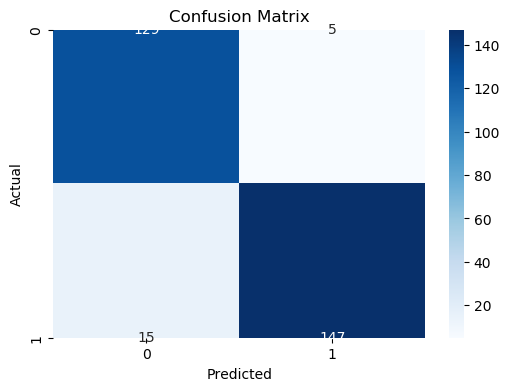

In [4]:
# Credit Card Fraud Detection Project

# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler

# Step 2: Load dataset
data = pd.read_csv(r'C:\Users\Miss Kavali\Downloads\creditcard.csv\creditcard.csv')  

# Step 3: Data Exploration
print("Dataset Shape:", data.shape)
print("\nMissing Values:\n", data.isnull().sum())

# Step 4: Preprocessing
# Standardize 'Amount' and 'Time'
scaler = StandardScaler()
data['Amount_Scaled'] = scaler.fit_transform(data[['Amount']])
data['Time_Scaled'] = scaler.fit_transform(data[['Time']])

# Drop original 'Amount' and 'Time' columns
data = data.drop(['Amount', 'Time'], axis=1)

# Step 5: Handle class imbalance
# Check class distribution
print("\nClass Distribution:\n", data['Class'].value_counts())

# Separate majority and minority classes
fraud = data[data['Class'] == 1]
non_fraud = data[data['Class'] == 0]

# Undersample majority class
non_fraud_sample = non_fraud.sample(len(fraud), random_state=42)

# Combine minority class with undersampled majority class
balanced_data = pd.concat([fraud, non_fraud_sample])

# Shuffle the data
balanced_data = balanced_data.sample(frac=1, random_state=42)

# Step 6: Split into features and target
X = balanced_data.drop('Class', axis=1)
y = balanced_data['Class']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 7: Model Building
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 8: Predictions
y_pred = model.predict(X_test)

# Step 9: Evaluation
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC AUC Score:", roc_auc_score(y_test, y_pred))

# Step 10: Visualization
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
